# Assignment 3 - Supervised Learning

## Srishti Saha
Netid: ss1078

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [365]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

#### ANSWER

**(a) What is the likelihood function for all the  𝑁  samples in our training dataset that we will wish to maximize?**

We have been given that for one sample
$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

For the entire dataset, likelihood is:

$$L(\mathbf{w})=\prod_{i=1}^{N} P(Y=y_i|X=\mathbf{x}_i)$$
$$L(\mathbf{w})=\prod_{i=1}^{N} \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$
Substituting likelihood for Bernoulli distribution:


$$
L(\mathbf{w})=\prod_{i=1}^{N} \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]^{1-y_i} \hspace{0.7cm}(1)
$$


Here:
$$
\hspace{2cm}\sigma (\mathbf{w}^{\intercal}\mathbf{x}) = \dfrac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}}\hspace{0.1cm}:Sigmoid\hspace{0.1cm}function
$$


**(b) Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).**

$$C(\mathbf{w})= -log(L(\mathbf{w}))$$
$$C(\mathbf{w})= -log(\prod_{i=1}^{N} \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]^{1-y_i})$$



$$
C(\mathbf{w})= -\dfrac{1}{N}\sum_{i=1}^N y_i log(\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)) + (1-y_i)log(1-\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)) \hspace{0.7cm}(2)
$$

**(c) Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.**


$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$$

On differentiating with respect to $\mathbf{w_{0}}$:

$$-\dfrac{\partial C}{\partial w_0}  =\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,0}$$

Similarly, for $\mathbf{w_{1}}$ and $\mathbf{w_{2}}$:

$$-\dfrac{\partial C}{\partial w_1}  =\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,1}$$
$$-\dfrac{\partial C}{\partial w_2}  =\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,2}$$

Thus, in general format:

$$\nabla_{\mathbf{w}}C(\mathbf{w}) =-\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,j}$$

or

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = [-\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,0},-\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,1},-\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,2}]$$

**(d) Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.**


$$
\mathbf{w}^{(i+1)}=\mathbf{w}^{(i)}+ \dfrac{\eta}{N}(\sum_{i=1}^N [y_i- \sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)]x_{i,j})\hspace{0.7cm}(3) 
$$

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interp
from sklearn.model_selection import StratifiedKFold

**(e) Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?**

In [7]:
data = pd.read_csv("A3_Q1_data.csv")

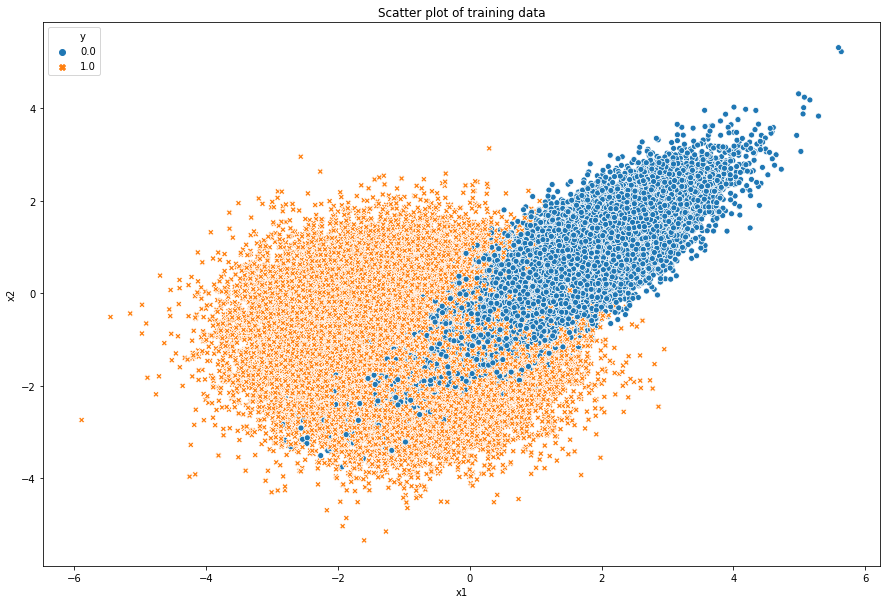

In [8]:
sns.scatterplot('x1', 'x2', hue='y',style="y",data=data)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Scatter plot of training data')
plt.show()

The data looks separable. However, it is not linearly separable. Logistic regression is not a good option for this as the boundary is non-linear. It needs a more polynomial decision boundary (kernel) to separate these classes.

**(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?**

In [9]:
#data.isnull().sum()
#Checking for missing data
NAs = pd.concat([data.isnull().sum()], axis=1, keys=['Number of nulls'])
NAs# no missing data

data.describe() # scale of both x1 and x2 seems to be similar

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


The data seems to be of similar scale without any null values. It looks like no special preprocessing will be required here.

**(g) Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.**

In [10]:
# Sigmoid function 
def sigmoid(x=np.array(())):
    return 1 / (1 + np.exp(-x))

# predict probability fn will apply sigmoid on dot product of X and weights
def predict_prob(X,weights):
    return sigmoid(np.dot(X,weights))

**(h) Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.**

In [11]:
def cost_function(feat= 0, lab= 0, weigh= 0, pred_=0):
# cost function for Log Reg as per equation (2) above: 
    m = len(feat)
    pred = 0
    if pred_ == 0:
        pred = predict_prob(feat,weigh)
    else:
        pred = pred_
    cost = (1/m)*(np.dot((-1*lab),np.log(pred)) - np.dot((1-lab).transpose(),np.log(1-pred)))
    return cost 

**(i) Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:**
**1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.**
**2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.**
**3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.**

In [15]:
def gradient(X,y,weight):
# gradient calculation
    preds = predict_prob(X,weight)
    gradient = (1/len(y)) * np.dot(X.transpose(),(preds-y))
    return gradient        

def gradient_descent(X,y,epsilon=(1e-6),weight,eta=0.1): 
# gradient descent: weight update and stopping criterion ( L2 norm of the weight vector changes by no 
#more than  1e−6  between iterations)  
    diff = 1
    i = 0
    costs = []
    while (diff >= epsilon):
        #print(diff)
        orig_dist = np.linalg.norm(weight,ord=2)
        # update weights as per eqn (3) above
        weight = weight - (eta * gradient(X,y,weight))# update weights
        new_dist = np.linalg.norm(weight,ord=2)
        diff = np.abs(orig_dist-new_dist)
        i = i + 1
        cost = self.cost_function(X,y,weight)
        #print("Iteration : %s  , Cost: %s"%(i,cost))
        costs.append(cost)
    return (costs) 

**(j) Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).**

In [16]:
# Sigmoid function 
def sigmoid(x=np.array(())):
    return 1 / (1 + np.exp(-x))

# predict probability fn will apply sigmoid on dot product of X and weights
def predict_prob(X,weights):
    return sigmoid(np.dot(X,weights))
    
class LogReg: 
    def __init__(self):
        self.X = np.array([])
        self.y = np.array([])
        self.X_test = np.array([])
        self.y_test = np.array([])
        self.weight = np.array([])
 
    def fit(self,X,y,Learn_Rate=0.1,weights = [],X_test=0,y_test=0,test_included=False,epsilon=(1e-6)):
        self.X = np.insert(X,0,1,axis=1)# add a column of 1s
        self.y = y
        self.X_test = np.insert(X_test,0,1,axis=1)# add a column of 1s
        self.y_test = y_test
        if (weights == []):
            self.weight = np.random.rand(np.shape(self.X)[1]).transpose()
        else:   
            self.weight = np.arrays(weights).transpose()
        self.eta = Learn_Rate
        self.epsilon= epsilon
        self.train_cost = []
        self.test_cost = []
        self.flag = test_included
        self.gradient_descent()    

    def cost_function(self,feat= 0, lab= 0, weigh= 0, pred_=0):
    # cost function for Log Reg as per equation (2) above: 
        m = len(feat)
        pred = 0
        if pred_ == 0:
            pred = predict_prob(feat,weigh)
        else:
            pred = pred_
        cost = (1/m)*(np.dot((-1*lab),np.log(pred)) - np.dot((1-lab).transpose(),np.log(1-pred)))
        return cost    

    def gradient(self):
        # gradient calculation
        preds = predict_prob(self.X,self.weight)
        #print(preds.shape)
        gradient = (1/len(self.y)) * np.dot(self.X.transpose(),(preds-self.y))
        return gradient        
   
    def gradient_descent(self): 
    # gradient descent: weight update and stopping criterion ( L2 norm of the weight vector changes by no 
    #more than  1e−6  between iterations)  
        diff = 1
        i = 0
        while (diff >= self.epsilon):
            #print(diff)
            orig_dist = np.linalg.norm(self.weight,ord=2)
            # update weights as per eqn (3) above
            self.weight = self.weight - (self.eta * self.gradient())# update weights
            new_dist = np.linalg.norm(self.weight,ord=2)
            diff = np.abs(orig_dist-new_dist)
            i = i + 1
            cost = self.cost_function(self.X,self.y,self.weight)
            #print("Iteration : %s  , Cost: %s"%(i,cost))
            self.train_cost.append(cost)
            if self.flag == True:
                test_cost_curr = self.cost_function(self.X_test,self.y_test,self.weight)
                self.test_cost.append(test_cost_curr) 
                
            self.n_epochs=i
        return self        
    
    def predict(self,X_test, response_type = "Class", thresh=0.5):
        #Types of predictions: probability or class (binary)-- threshold: 0.5
        self.X_test = np.insert(X_test,0,1,axis=1)# add a column of 1s
        preds = predict_prob(self.X_test,self.weight)
        if(response_type=="Prob"):
            return preds
        else:
            prediction = np.zeros(len(preds))
            for i in range(len(preds)):
                if preds[i] > thresh:
                    prediction[i] = 1
                else:
                    prediction[i] = 0
            return prediction        

**(k) Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.**

In [17]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

lr_model=LogReg()

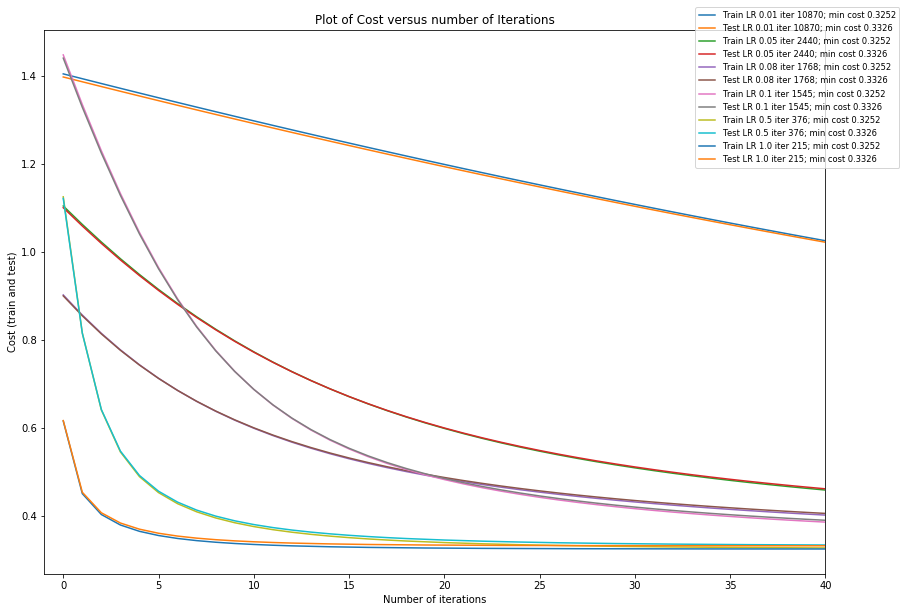

In [18]:
# plotting number of interations for different learning rate
fig = plt.figure(figsize=(14, 10))
rates = np.array([0.01,0.05,0.08,0.1,0.5,1])
fontP = FontProperties()
fontP.set_size('small')
for i in range(len(rates)):
    lr_model=LogReg()
    lr_model.fit(X_train,y_train,Learn_Rate=rates[i],X_test=X_test,y_test=y_test,test_included=True)
    train_cost = lr_model.train_cost
    test_cost = lr_model.test_cost
    plt.plot(range(len(train_cost)),train_cost,
             label="Train LR {} iter {}; min cost {}".format(round(rates[i],2),lr_model.n_epochs,round(train_cost[-1],4)))
    plt.plot(range(len(test_cost)),test_cost,
             label="Test LR {} iter {}; min cost {}" .format(round(rates[i],2),lr_model.n_epochs,round(test_cost[-1],4)))
    plt.legend(prop=fontP,bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost (train and test)")
    plt.title("Plot of Cost versus number of Iterations")
    plt.xlim(-1,40)

We see that with increasing learning rates: 
* the required number of iterations to converge decreases
* Minimum cost stays the same approximately (more or less)

The learning rate of my choice is **1.0 as it converges with the least number of iterations** and has the minimum cost as well.

**(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance.**

In [19]:
cv = StratifiedKFold(n_splits=15)
cv.get_n_splits(X_train, y_train)

predictions = np.empty(y_train.shape[0],dtype='object')
for train_idx, test_idx in cv.split(X_train, y_train):
    cv_X_train, cv_X_test = X_train[train_idx], X_train[test_idx]
    cv_y_train = y_train[train_idx]
    lr = LogReg()
    lr.fit(X = cv_X_train,y=cv_y_train,Learn_Rate=1.0) 
    y_score = lr.predict(cv_X_test,response_type = "Prob")
    predictions[test_idx] = y_score

Cross validated: ROC AUC=0.9345


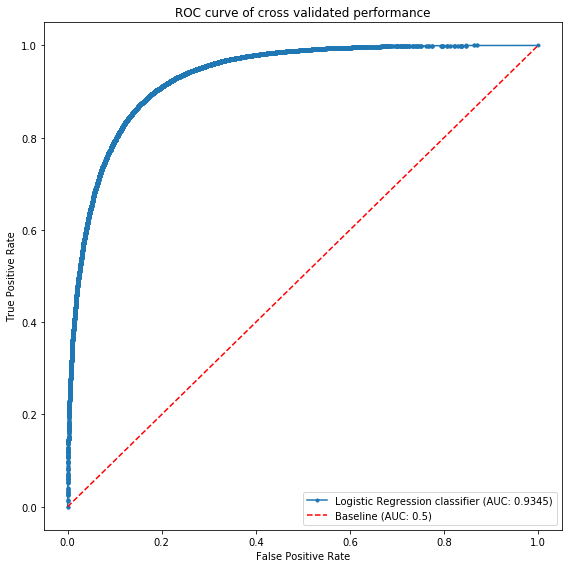

In [20]:
fig = plt.figure(figsize=(8, 8))
fpr, tpr, _ = roc_curve(y_train, predictions, pos_label=1)

cv_auc = roc_auc_score(y_train, predictions)
print('Cross validated: ROC AUC=%.4f' % (cv_auc))
plt.plot(fpr, tpr, marker='.', label=('Logistic Regression classifier (AUC: {})'.format(round(cv_auc,4))))
plt.plot([0, 1], [0, 1],'r--', label = "Baseline (AUC: 0.5)")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of cross validated performance')
plt.legend()
plt.tight_layout()

**(m) Why do we use cross validation?**

Cross validation is primarily used for 2 reasons:
1. To ensure and test the generalizability of a model- so that we do not choose a high variance model that might overfit on our training dataset. Thus, it *helps preventing overfitting.*
2. To find and *select the best hyperparameters for a model* in order to reduce error and bias.

**(n) Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?**

In [21]:
lr = LogReg()
lr.fit(X_train,y_train, Learn_Rate=1.0)

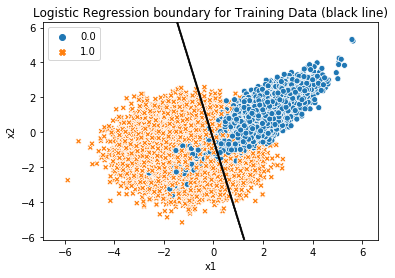

In [22]:
# scatter plot for training dataset
ax = sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train)  
h=0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
probs = lr.predict( np.array([xx.ravel(), yy.ravel()]).transpose()).reshape(xx.shape)
cmap_self = ListedColormap(['black'])
plt.contour(xx, yy, probs, cmap=cmap_self, alpha=0.4)  
plt.title('Logistic Regression boundary for Training Data (black line)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

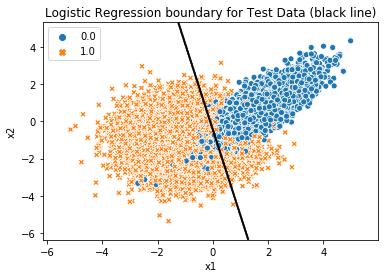

In [23]:
# scatter plot for training dataset
ax = sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,style=y_test)  
h=0.02

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
probs = lr.predict( np.array([xx.ravel(), yy.ravel()]).transpose()).reshape(xx.shape)
cmap_self = ListedColormap(['black'])
plt.contour(xx, yy, probs, cmap=cmap_self, alpha=0.4)  
plt.title('Logistic Regression boundary for Test Data (black line)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

The Logistic Regression decision boundary is shown by the black line here. It is a linear boundary.

As suggested earlier, a linear boundary like Logistic Regression does not do an effective job at separating the classes. It could definitely be improved. We could use any non-linear decision boundary (ex: KNN) or a hyperplane to do the same.

**(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?**

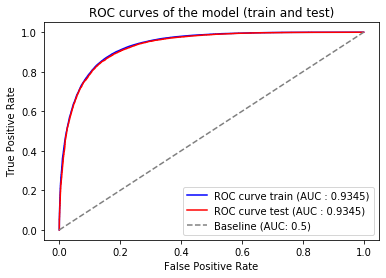

In [24]:
fpr_train, tpr_train, thresholds = roc_curve( y_train,lr.predict(X_train,response_type = "Prob"))
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds = roc_curve(y_test,lr.predict(X_test,response_type = "Prob"))
auc_test = auc(fpr, tpr)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue',label='ROC curve train (AUC : %0.4f)' % auc_train)
plt.plot(fpr_test, tpr_test, color='red',label='ROC curve test (AUC : %0.4f)' % auc_test)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--',label = "Baseline (AUC: 0.5)")


plt.legend(loc="lower right")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curves of the model (train and test)')


plt.show()

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [85]:
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn import linear_model
import sklearn
import numpy as np
import random
import pandas as pd
#!pip install mlxtend

**(a) Construct your dataset from the MNIST dataset of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.**

In [5]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

In [6]:
y_new = (y == 3).astype(int)

print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_new))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1]


**(b) Plot 10 examples of each class (i.e. class  𝑦=0 , which are not 3's and class  𝑦=1  which are 3's), from the training dataset.**

In [28]:
images_to_plot = 10
indexThreesList = [ i for i in range(len(y_new)) if y_new[i] == 1 ]
indexNonThreesList = [ i for i in range(len(y_new)) if y_new[i] == 0 ]
random.seed(10)
random_indices3 = random.sample(indexThreesList, images_to_plot)
random_indicesNon3 = random.sample(indexNonThreesList, images_to_plot)
random_indices= random_indices3+random_indicesNon3
sample_images = pd.DataFrame(X).loc[random_indices, :]
sample_labels = pd.DataFrame(y_new).loc[random_indices]

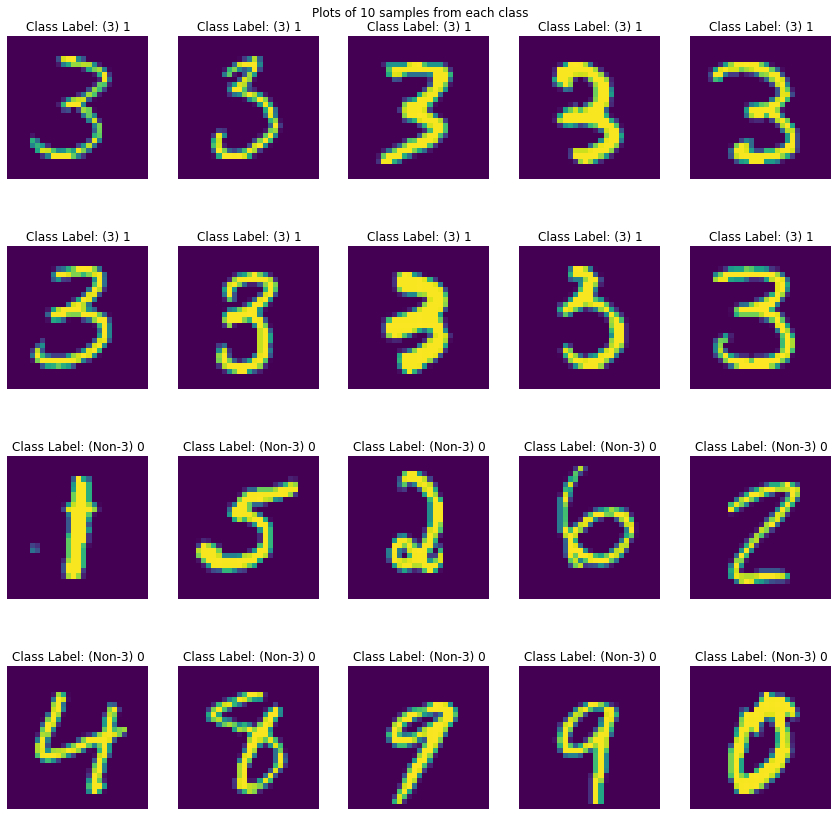

In [29]:
fig = plt.figure(figsize=(12, 12))
for idx in range (len(random_indices)):
    im_idx=random_indices[idx]
    plottable_image = np.reshape(X[im_idx], (28, 28))
    ax = fig.add_subplot(4, 5, idx+1)
    ax.imshow(plottable_image, cmap='viridis')
    if sample_labels.iloc[idx][0]==1:
        ax.set_title('Class Label: (3) {}'.format(sample_labels.iloc[idx][0]))
    else:
        ax.set_title('Class Label: (Non-3) {}'.format(sample_labels.iloc[idx][0]))
    ax.set_xbound([0,28])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis('off')
#plt.title("Samples from Class Label 1 (threes) and Class Label 0 (non-threes)")
plt.suptitle('Plots of 10 samples from each class')    
plt.tight_layout()
plt.show()


**(c) How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?**

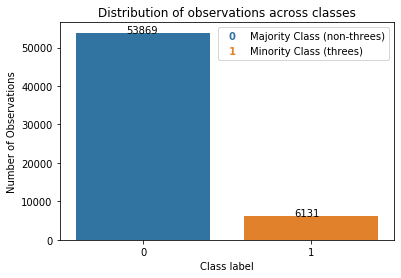

In [30]:
ax=sns.countplot(y_new)
plt.title("Distribution of observations across classes")
plt.xlabel("Class label")
plt.ylabel("Number of Observations")

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

handltext = ["0", "1"]
labels = ["Majority Class (non-threes)", "Minority Class (threes)"]


t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))
plt.show()


In [31]:
# no. of 3s=6131
# no. of non-3s= 53869
# total length=60000
print('Class distribution: %s' % np.bincount(y_new))
print('Class distribution in percentage: %s' % np.around(np.bincount(y_new)/len(y_new),4))

Class distribution: [53869  6131]
Class distribution in percentage: [0.8978 0.1022]


There is an imbalance of classes with more data points in the negative class (class label-0 i.e. non-three images). This will lead to higher weightage to the majority class (class 0) and will result in misclassifications of the moinority classes (class 1 i.e. threes).

This might lead to the minor class (class 1) to be incorrectly classified as class 0 when a model is built on it.

**(d) Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.**

In [7]:
## from kaggle competition sample code
def cv_performance_assessment(X,y,k,clf):
    '''Cross validated performance assessment
    
    X   = training data
    y   = training labels
    k   = number of folds for cross validation
    clf = classifier to use
    
    Divide the training data into k folds of training and validation data. 
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are 
    aggregated and output
    '''
    # Establish the k folds
    prediction_scores = np.empty(y.shape[0],dtype='object')
    kf = StratifiedKFold(n_splits=k, shuffle=True)
    i=1
    for train_index, val_index in kf.split(X, y):
        # Extract the training and validation data for this fold
        print('iteration:',i,"Train indices selected:",train_index)
        X_train, X_val   = X[train_index], X[val_index]
        y_train          = y[train_index]
        
        # Train the classifier
        clf              = clf.fit(X_train,y_train)
        
        # Test the classifier on the validation data for this fold
        cpred            = clf.predict_proba(X_val)
        
        # Save the predictions for this fold
        prediction_scores[val_index] = cpred[:,1]
        i=i+1
    return prediction_scores


def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.4f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()

In [8]:
num_training_folds = 3
lr_model = linear_model.LogisticRegression(solver='liblinear',max_iter=1000)
# Perform cross validated performance assessment
prediction_scores = cv_performance_assessment(X,y_new,num_training_folds,lr_model)

# fit lr model
lr_model = lr_model.fit(X,y_new)

iteration: 1 Train indices selected: [    0     1     2 ... 59997 59998 59999]
iteration: 2 Train indices selected: [    1     3     5 ... 59997 59998 59999]
iteration: 3 Train indices selected: [    0     2     3 ... 59990 59993 59996]


Text(0.5, 1, 'ROC curve from cross validation')

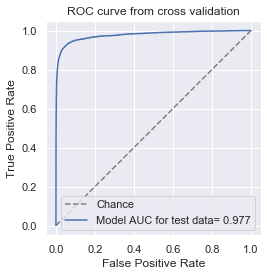

In [212]:
# Compute and plot the ROC curves
plot_roc(y_new, prediction_scores)
plt.title("ROC curve from cross validation")

In [10]:
x_test, y_test = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')

y_test_new = (y_test == 3).astype(int)

In [11]:
test_pred=lr_model.predict(x_test)
test_pred_prob= lr_model.predict_proba(x_test)

maj_class_probs = [0 for _ in range(len(y_test_new))]
random_class_probs=np.random.rand(10000)

Class 0: ROC AUC=0.500
Random predictor: ROC AUC=0.494
Logistic: ROC AUC=0.985


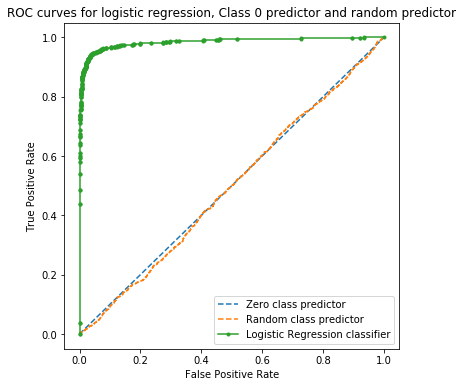

In [12]:
# calculate scores
maj_auc = metrics.roc_auc_score(y_test_new, maj_class_probs)
rand_auc = metrics.roc_auc_score(y_test_new, random_class_probs)
lr_auc = metrics.roc_auc_score(y_test_new, test_pred_prob[:,1])  
    
print('Class 0: ROC AUC=%.3f' % (maj_auc))
print('Random predictor: ROC AUC=%.3f' % (rand_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
maj_fpr, maj_tpr, _ = metrics.roc_curve(y_test_new, maj_class_probs)
rand_fpr, rand_tpr, _ = metrics.roc_curve(y_test_new, random_class_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test_new, test_pred_prob[:,1])

fig = plt.figure(figsize=(6, 6))
# plot the roc curve for the model
plt.plot(maj_fpr, maj_tpr, linestyle='--', label='Zero class predictor')
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random class predictor')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curves for logistic regression, Class 0 predictor and random predictor')
# show the legend
plt.legend()
# show the plot
plt.show()

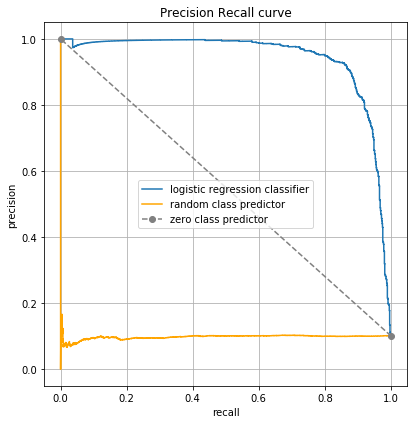

In [13]:
fig = plt.figure(figsize=(6, 6))
def plot_prec_recall(labels, prediction_scores):
    precision, recall, _ = metrics.precision_recall_curve(labels, prediction_scores, pos_label=1)
    plt.step(recall,precision,label="logistic regression classifier")
    
    #rand_preds = np.random.rand(0,1,labels.shape[0])
    precision1, recall1, _ = metrics.precision_recall_curve(labels, random_class_probs, pos_label=1)
    
    plt.plot(recall1,precision1,color='orange',label="random class predictor")

    
    zero_preds= np.zeros(labels.shape)
    precision2, recall2, _ = metrics.precision_recall_curve(labels, zero_preds, pos_label=1)
    plt.plot(recall2,precision2,'--o',color='grey',label="zero class predictor")
    
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.title('Precision Recall curve')
    plt.tight_layout()
    
    
# Compute and plot the ROC curves
plot_prec_recall(y_test_new, test_pred_prob[:,1])

The model definitely works better than the random class predictor and the model that predicts all records as 0 (non-threes). This can be clearly seen from the ROC curve where the AUC for the logistic regression model is 0.985 which is way higher than the baseline performance of 0.5 (Class 0 predictor). This is also corroborated by the precision-recall curve where the logistic regression model performs better than the base line and the random class predictor underperforms.

**(f) Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the LogisticRegression module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter  𝐶  is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3)  𝐹1 -score, and (4) area under the curve (AUC). Describe the implications of your findings.**

In [14]:
def cost_function(y,preds):
    # Computes the cost function for all the training samples
    m=y_new.shape[0]
    
    class_a=y*np.log(preds)
    class_b=(1-y)*np.log(1-preds)
    
    cost = -(1 / m) * np.sum(class_a+class_b)
    return cost

In [15]:
#  lasso
out=[]
losses=[]
coeffs_nonzero=[]
f1s=[]
aucs=[]
for i in [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]:
    lasso = linear_model.LogisticRegression(solver='liblinear',max_iter=2000, penalty= 'l1',C=i)
    lasso.fit(X, y_new)
    Prediction_lasso = lasso.predict(X)
    prob = lasso.predict_proba(X)[:,1]
    pred = lasso.predict(X)
    # loss values
    loss_val = cost_function(np.ravel(y_new), prob)
    # f1-scores
    f1 = f1_score(np.ravel(y_new), pred)
    # auc
    auc = roc_auc_score(np.ravel(y_new), prob)
    # non-zero parameters
    coef_nonzero = len(lasso.coef_[0]) - list(lasso.coef_[0]).count(0.0)
    losses.append(loss_val)
    coeffs_nonzero.append(coef_nonzero)
    f1s.append(f1)
    aucs.append(auc)
    out.append((coef_nonzero, loss_val, f1, auc))

Text(0.5, 0.98, 'Variation of Loss,AUC, non-zero coefficients and F1-scores with regularization coefficient')

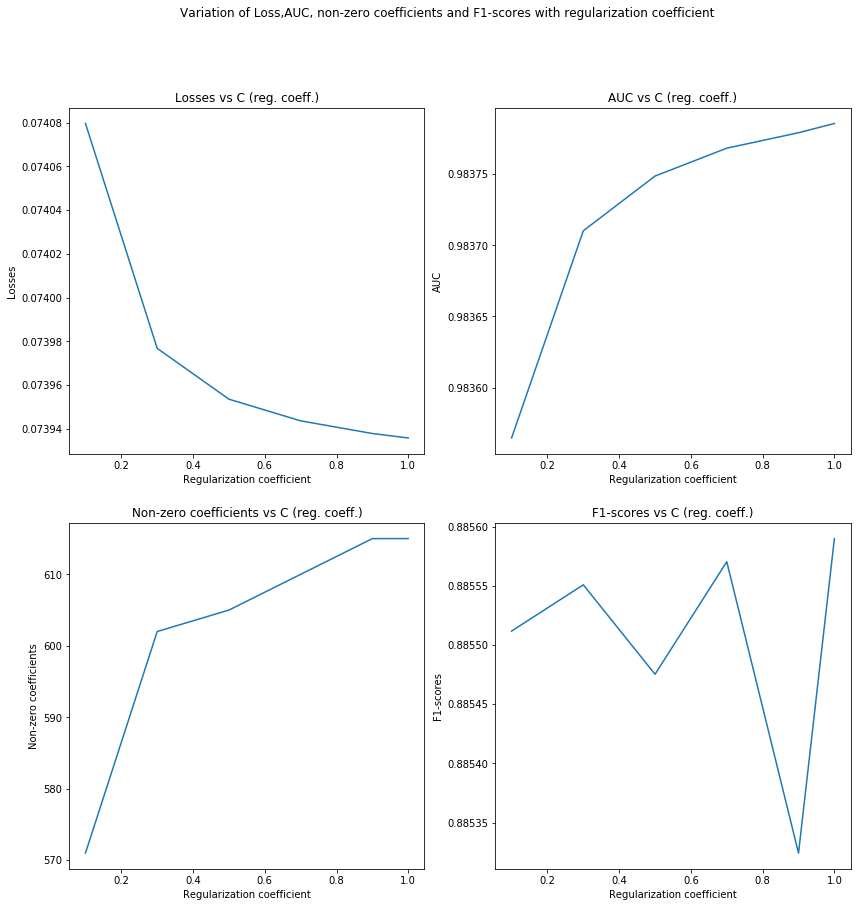

In [16]:
c_vals=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

fig, ax = plt.subplots(2,2,figsize=(14,14))
ax[1,1].plot(c_vals,f1s)
ax[1,1].set_xlabel("Regularization coefficient")
ax[1,1].set_ylabel("F1-scores")
ax[1,1].set_title("F1-scores vs C (reg. coeff.)")

ax[0,1].plot(c_vals,aucs)
ax[0,1].set_xlabel("Regularization coefficient")
ax[0,1].set_ylabel("AUC")
ax[0,1].set_title("AUC vs C (reg. coeff.)")

ax[1,0].plot(c_vals,coeffs_nonzero)
ax[1,0].set_xlabel("Regularization coefficient")
ax[1,0].set_ylabel("Non-zero coefficients")
ax[1,0].set_title("Non-zero coefficients vs C (reg. coeff.)")

ax[0,0].plot(c_vals,losses)
ax[0,0].set_xlabel("Regularization coefficient")
ax[0,0].set_ylabel("Losses")
ax[0,0].set_title("Losses vs C (reg. coeff.)")

fig.suptitle("Variation of Loss,AUC, non-zero coefficients and F1-scores with regularization coefficient")

As the value of **regularization coefficient increases**, the area under the curve and the non-zero coefficients seem to decrease. Since C is the inverse of regularization strength, it means **as regularization strength decreases**, *AUC decreases*. It also shrinks lesser parameters to 0 i.e. we have *more non-zero parameters*. 

However, classification loss seems to decrease with increase C (decrease in regularization strength). The F1-score follows no clear pattern but the model with C=0.9 seems to have the lowest F1-score.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

In [17]:
from scipy.stats import expon
import pandas as pd
import matplotlib.pyplot as plt

**(a) Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$.**

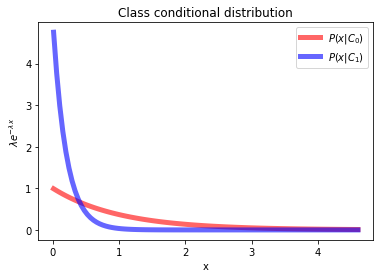

In [18]:
fig,ax = plt.subplots(1,1)

x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)

ax.plot(x,expon.pdf(x,scale=1),'r-',lw=5,alpha=0.6,label='$P(x|C_0)$')
ax.plot(x,expon.pdf(x,scale=(1/5)),'b-',lw=5,alpha=0.6,label='$P(x|C_1)$')
plt.title('Class conditional distribution')
plt.xlabel('x')
plt.ylabel('$\lambda e^{-\lambda x}$')
plt.legend()
plt.show()

**(b) Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form:** 

**If $x > x^*$, then predict Class 0, otherwise predict Class 1**

**Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.**

##### Answer:

For the Bayes' decision rule, we need to compute the posterior probability for both classes. Thus, we need to compute $P(C_0|x)$ and $P(C_1|x)$ and find the posterior probability that is larger.

We have:

Posterior distribution: 


$$
P(C_i|x)=\dfrac{P(x|C_i)P(C_i)}{P(x)} \hspace{0.7cm}(1)
$$


We also have : 


$$
P(x|C_i)=\lambda_i e^{−\lambda_i x}
$$

and 

$$
P(C_0)=P(C_1)=0.5
$$


To compute the boundary condition for both classes, we compare the posterior probabilities and compute x from there. 
Thus, from equation 1:

$$\dfrac{P(x|C_1)P(C_1)}{P(x)} \geq \dfrac{P(x|C_0)P(C_0)}{P(x)}$$
Replacing values for marginal probabilities of the classes and cancelling $P(x)$ on both the sides in the equation:

$$0.5(P(x|C_1)) \geq 0.5(P(x|C_0))$$

From definition of $P(x|C_i)$:
 
$$\lambda_1 e^{−\lambda_1 x} \geq \lambda_0 e^{−\lambda_0 x}$$

$$\dfrac{\lambda_1}{\lambda_0} \geq e^{x(\lambda_1-\lambda_0)}$$

Substituting $\lambda_0=1$ and $\lambda_1=5$:

$$5 \geq e^{4x}$$

$$x \leq \dfrac{ln{5}}{4}$$

$$x \leq 0.4023$$

This indicates the Bayes' decision rule: if x is less than or equal to 0.4023, then prediction is class 1 or else it is class 0.

**(c) How does your answer in (b) relate to the the plot you made in (a)? Why?**

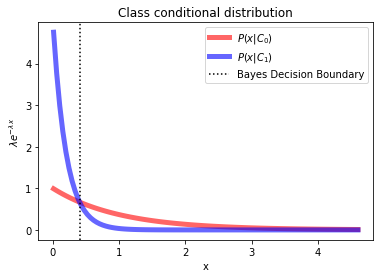

In [19]:
y1= expon.pdf(x,scale=1)
y2= expon.pdf(x,scale=(1/5))
fig,ax = plt.subplots(1,1)

x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)

ax.plot(x,y1,'r-',lw=5,alpha=0.6,label='$P(x|C_0)$')
ax.plot(x,y2,'b-',lw=5,alpha=0.6,label='$P(x|C_1)$')

plt.axvline(0.4023, color='black', ls=':',label="Bayes Decision Boundary")
plt.title('Class conditional distribution')
plt.xlabel('x')
plt.ylabel('$\lambda e^{-\lambda x}$')
plt.legend()
plt.show()



The intersection point of the two curves is around 0.4023. Since the prior probabilities of both classes are equal, we can observe and conclude from the above plot that predicted class is 1 when the blue curve is above the red curve i.e. $P(C_1|x)>P(C_1|x)$ 

**(d) Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?**

In [20]:
train= pd.read_csv("A3_Q3_train.csv",usecols=('x','y'))
test= pd.read_csv("A3_Q3_test.csv",usecols=('x','y'))

In [21]:
test['rule_test_preds']=np.where(test.x<=0.4023, 1, 0)
rule_misclass_rate= sum(test.y!=test.rule_test_preds)/len(test.rule_test_preds)
print("misclassification rate based on rule is:", rule_misclass_rate)

misclassification rate based on rule is: 0.2339


**(e) Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?**

In [22]:
lr=linear_model.LogisticRegression(solver='lbfgs')
lr.fit(np.array(train.x).reshape(-1,1),train.y)
test['lr_test_preds']=lr.predict(np.array(test.x).reshape(-1,1))
lr_misclass_rate= sum(test.y!=test.lr_test_preds)/len(test.lr_test_preds)
print("misclassification rate from logistic regression is:", lr_misclass_rate)

misclassification rate from logistic regression is: 0.234


The error rate (0.234) is same as that of Bayes classifier.

**(f) What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?**

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[-3.97552165]]
[1.60348178]


We have the sigmoid function as:

$$S(x)=\dfrac{1}{1+e^{w_0+w_1x}} \geq 0.5$$
$$S(x)=\dfrac{1}{1+e^{1.6035-3.9755x}} \geq 0.5$$
$$e^{1.6035-3.9755x}\geq 1$$
$$x\leq \dfrac{1.6035}{3.9755} $$
$$x \leq 0.4033$$

The decision boundary for logistic regression model is 0.4033. This is very close to the Bayes' decision boundary. Hence, we get similar errors too.

**(g) If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?**

If the prior probabilities of the class $$P(C_0) \neq P(C_1) \neq 0.5$$
and 
$$ P(C_1)>P(C_0)$$
then:

$$\dfrac{P(x|C_1)P(C_1)}{P(x)} \geq \dfrac{P(x|C_0)P(C_0)}{P(x)}$$
$${P(x|C_1)P(C_1)} \geq {P(x|C_0)P(C_0)}$$
$$\dfrac{P(C_1)}{P(C_0)} \geq \dfrac{P(x|C_0)}{P(x|C_1)}$$

Substituting $P(x|C_i)=\lambda_i e^{−\lambda_i x}$

We have:

$$
\dfrac{P(C_1)}{P(C_0)} \geq \dfrac{\lambda_0}{\lambda_1} e^{x(\lambda_1-\lambda_0)}\hspace{0.7cm}(2)
$$


Now, we are told that: $\dfrac{P(C_1)}{P(C_0)}>1$.
Let $r \dfrac{P(C_1)}{P(C_0)}$.
Thus, $r>1$

Thus in the above equation (2), we have:

$$\dfrac{\lambda_1}{\lambda_0}r \geq e^{x(\lambda_1-\lambda_0)}$$
Substituting for $\lambda_0$ and $\lambda_1$
$$e^{4x} \leq 5r$$
$$x \leq \dfrac{ln(5r)}{4}$$

In the above case, since $r>1$, the decision boundary will shift towards a higher value (to the right). The value of _x*_ will be greater than the case where the prior probabilities were equal. Thus, The optimial decision boundary will be higher than 0.4023.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

**(a) Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.**

The problem I would like to solve is to predict if a kickstarter project will be successful or will fail before its actual deadline. I would also like to identify the factors that are key in determining the success rate of a project. I am interested in this project as I was once a part of a similar concept during my tenure at SAP Labs wherein we had to crowdfund for our projects and the projects that completed their target on time used to be incubated by a lab within the organization.

*Motivation:* My motivation to work on such projects comes from the question 'What product/service if developed will gain the most traction from people?' It is interesting to learn what people expect from the innovators and what kills it for them or makes a venture successful. I believe studying the Kickstarter dataset will give a brief insight into these trends. Hence, I have chosen this dataset for my analysis.

This stint with crowdfunded projects had pushed me to study the trends in such concepts back then and I had tried to explore what project traits increase the likelihood of achieving the goal in time. However, with my limited knowledge of modelling and data processing, I could only create a basic model with some features. I would now like to explore the concept in further depth and would like to create a model that could predict the probability of a crowdfunded project like Kickstarter projects achieving its goal in time and becoming successful as a result. 

It will be interesting to note what traits of a project make it appealing to the crowd enough to increase the chances of funding the same. I would investigate several project features and create new hybrid features to then use them in my predictive model. I would also try to get the importance of these features and thus determine which would be te key features in determining the success of Kickstarter projects (and other similar crowdfunded projects)

In [153]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
import string

**(b) Download the data and plot the data to describe it.**

The data here is the Kickstarter Projects dataset (from Kaggle). The link can be found [here](https://www.kaggle.com/kemical/kickstarter-projects).

I am working on the dataset from 2018 as it has more updated and relevant information. The dataset has 15 columns. They are:

* ID: internal kickstarter id
* name: name of project 
* category: category
* main_category: category of campaign
* currency: currency used to support the project (by the backers)
* deadline: deadline for crowdfunding
* goal: fundraising goal - The funding goal is the amount of money that a project creator needs to complete their project.
* launched: date on which the project was launched
* pledged: amount pledged by "crowd"
* state: Current condition the project is in **(This will be the target function)**
* backers: number of supporters for the project (people who contributed)
* country: country pledged from
* usd pledged: amount of money pledged
* usd_pledged_real: Pledged amount in USD (conversion made by fixer.io api)
* usd_goal_real: Goal amount in USD

Of these a few will be selected and transformed to create additional features which will then go into model creation and training.

In [206]:
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")
kickstarters_2017.head()
print(kickstarters_2017.shape)

(378661, 15)


There are **378661 rows and 15 columns.**

In [155]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [156]:
#Distribution of data across state
percent_success = round(kickstarters_2017["state"].value_counts() / len(kickstarters_2017["state"]) * 100,2)

print("State Percent: ")
print(percent_success)

State Percent: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


In [207]:
# setting 'ID' as row index
df_kick= kickstarters_2017.set_index('ID')
# Filtering only for successful and failed projects
kick_projects = df_kick[(df_kick['state'] == 'failed') | (df_kick['state'] == 'successful')]

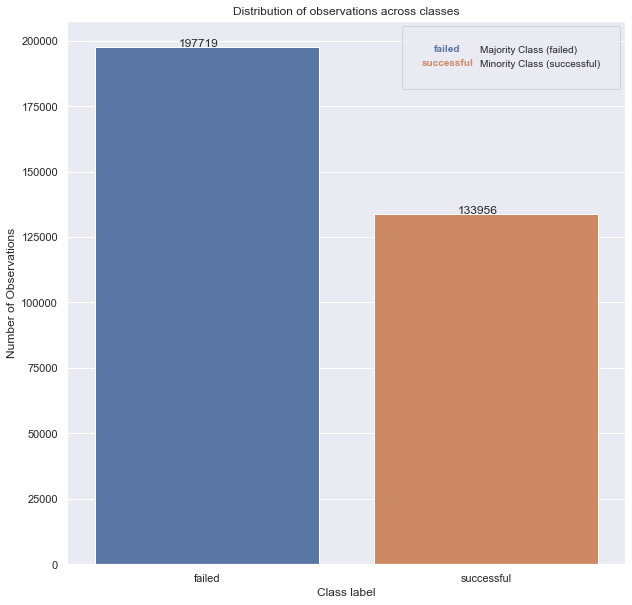

In [158]:
fig = plt.figure(figsize=(10, 10))
ax=sns.countplot(kick_projects['state'])
fontP = FontProperties()
fontP.set_size('small')
plt.title("Distribution of observations across classes")
plt.xlabel("Class label")
plt.ylabel("Number of Observations")

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

handltext = ["failed", "successful"]
labels = ["Majority Class (failed)", "Minority Class (successful)"]


t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels,prop={'size': 10}, handlelength=5, borderpad=2, handler_map={tuple : TextHandler()}) 
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))
plt.show()

There is no huge imbalance in the classes. It should be okay to pass the data through a classifier without treating for imbalance of data.

Let us first check the distribution of the variable 'Goal' in the dataframe as it determines the target a project has to achieve. 

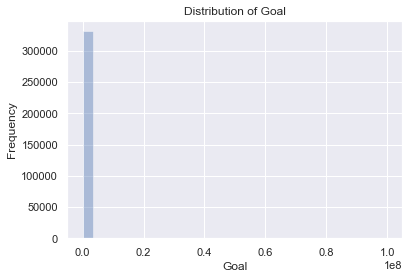

In [159]:
fig, ax = plt.subplots(1, 1)

g = sns.distplot(kick_projects.goal, kde=False, bins=30)

plt.xlabel('Goal')
plt.ylabel('Frequency')
plt.title('Distribution of Goal')
plt.show()

The distribution seems to be highly skewed and concentrated. Let us take the log transformation to see if the distribution changes.

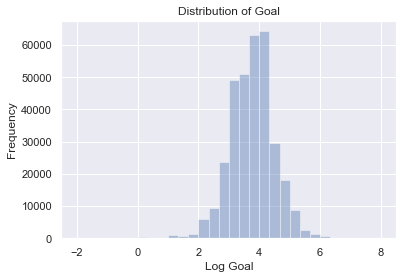

In [160]:
fig, ax = plt.subplots(1, 1)

g = sns.distplot(np.log10(kick_projects.goal), kde=False, bins=30)

plt.xlabel('Log Goal')
plt.ylabel('Frequency')
plt.title('Distribution of Goal')
plt.show()

Since this distribution seems to be normal, we will deal with log(Goal) for all further analysis.

In [161]:
import warnings
warnings.filterwarnings('ignore')

In [208]:
kick_projects['goal_log'] = np.log1p(kick_projects.goal)

## also converting pledged amount to log(pledged) to bring both amounts to same scale
kick_projects['pledged_log'] = np.log1p(kick_projects.pledged)

## also converting pledged amount to log(pledged) to bring both amounts to same scale
kick_projects['backers'] = np.log1p(kick_projects.backers)

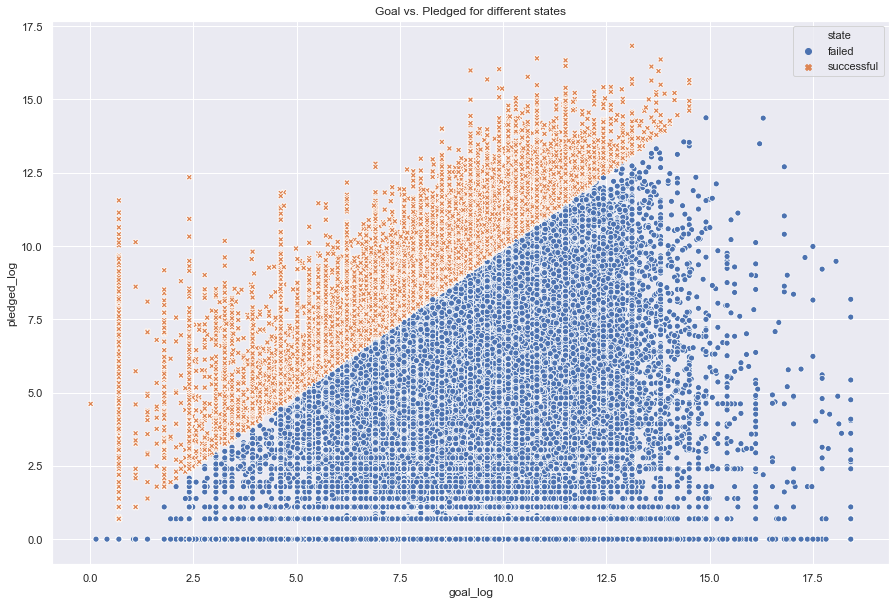

In [163]:
sns.scatterplot('goal_log', 'pledged_log', hue='state',style="state",edgecolors='black',data=kick_projects)
fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.title("Goal vs. Pledged for different states")
plt.show()

The presence of both goal and pledged in a predictive model will be deterministic of its success. By definition, 'pledged' is the amount that a project has already crowdfunded. If we have the information about the same, it will not longer be a prediction as the project already has started its crowdfunding process. Thus, we will remove 'pledged'.

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
#converting 'successful' state to 1 and failed to 0
kick_projects['state'] = (kick_projects['state'] =='successful').astype(int)
print(kick_projects.shape)

(331675, 16)


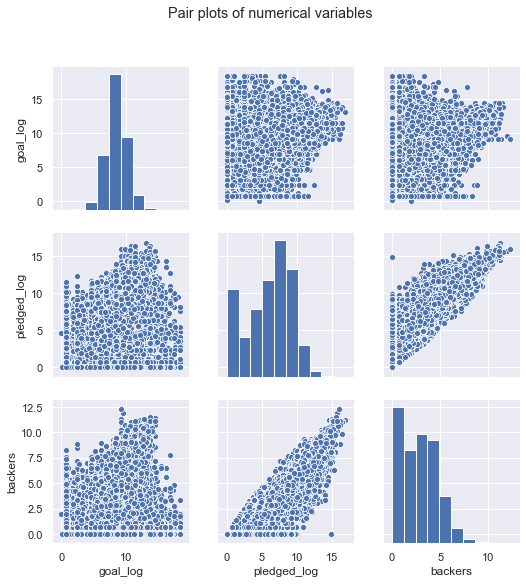

In [210]:
#pair wise plot to investigate overall patterns and trends in the data
sns.set()
# choosing a few columns to look into
cols = ['goal_log', 'pledged_log', 'backers']
g=sns.pairplot(kick_projects[cols], height = 2.5)
g.fig.suptitle("Pair plots of numerical variables", y=1.08)
plt.show();

There seems to be a linear trend between pledged and backers (they also look like they are highly correlated.) 

Let us also look at the pairwise plot.

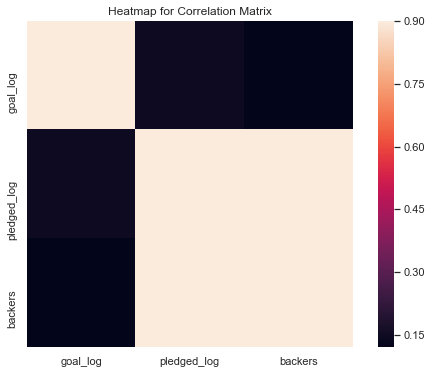

In [213]:
cont_vars=['goal_log', 'pledged_log', 'backers']
cat_vars=[ 'category', 'main_category', 'currency','country']
#correlation of continuous variables
corr_matrix=kick_projects[cont_vars].corr()
plt.subplots(figsize=(9,6))
plt.title("Heatmap for Correlation Matrix")
sns.heatmap(corr_matrix, vmax=0.9, square=True)

There is a high correlation between pledged and backers which is expected as higher the number of people supporting a project, higher will be the pledged amount. However, we will be removing both these features as they will not be present in the data while predicting for a new project.

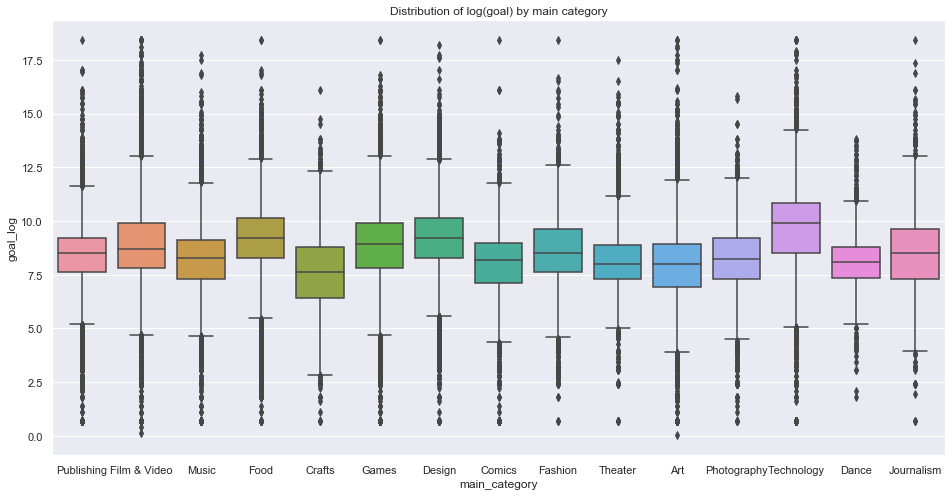

In [168]:
plt.figure(figsize=(16,8))
sns.boxplot(x='main_category',y='goal_log',data=kick_projects)
plt.title('Distribution of log(goal) by main category')
plt.show()

All main categories seem to have a similar distribution with no clear demarcation. 

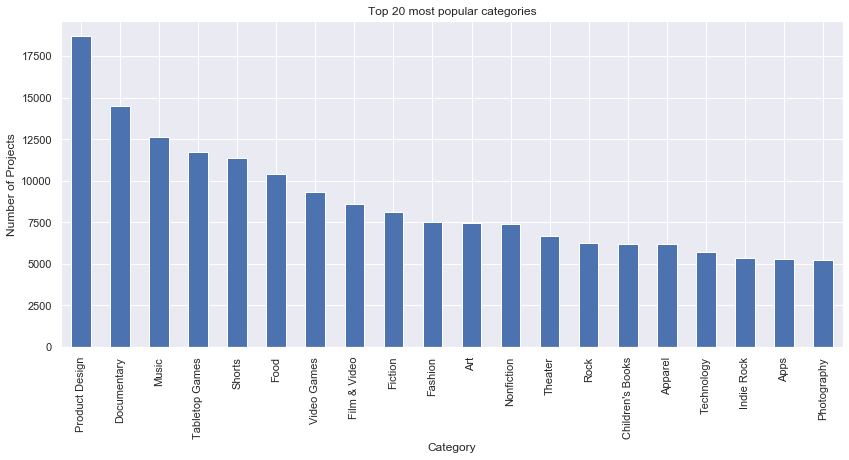

In [169]:
plot_cat=kick_projects['category'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(14,6), 
                                        title='Top 20 most popular categories')
plot_cat.set_xlabel("Category", fontsize=12)
plot_cat.set_ylabel("Number of Projects", fontsize=12)
plt.show()

The above plot shows the largest (by number of projects) subcategories. The largest subcategory is 'Product Design' with over 17500 projects. 

**(c) Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?**

The target variable is **'state'**. This variable tells us if the Kickstarter project is successful or has failed. It is thus a binary classification prediction exercise.

The predictors available are:
    
* Goal- This is the target amount to be crowdfunded by a project in order to be successful. It is transformed to log(Goal) for normal distribution
* Pledged- This is the amount the project has been able to crowdfund already. It will not be used as information of pledged will not be available while predicting a kickstarter projects' success; Knowledge of the pledged amount will determine the success of the project directly
* Backers- This indicates the number of people that have contributed to the projet so far. It will also not be included in the model for the same reason as above
* Main Category- the main category the project belongs to. There are 15 such main categories. This is a categorical feature.
* Category- These are subcategories of the projets. They are categorical features too. 
* Launched and deadline- These are date variables that define when the project was launched and what the deadline for the same is.
* Country- This is the country the project is from
* Currency- This is the currency the project uses for crowdfuncing

We also have goal and pledged amount in usd and real currency which we will be dropping as we are considering the goal amount as is.

The dataset will require some preprocessing (as it has to be normalized and treated for missing values). The steps have been shown below.

In [170]:
# Check for nulls.
kick_projects.isnull().sum()

name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
goal_log              0
pledged_log           0
dtype: int64

We will treat these missing values in the following manner:
    
* remove the column 'usd_pledged' that has a lot of missing values and is also correlated (by definition) to 'pledged'
* remove the three rows with missing 'names'

In [171]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
#creating a list of columns to be dropped
drop_cols1= ['pledged','usd pledged','usd_pledged_real','usd_goal_real', 'goal']
#dropping columns above
kick_projects.drop(drop_cols1, axis=1, inplace=True)

In [173]:
kick_projects.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,goal_log,pledged_log
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,0.000000,GB,6.908755,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,2.772589,US,10.308986,7.792349
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,1.386294,US,10.714440,5.398163
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,0.693147,US,8.517393,0.693147
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,1,5.416100,US,10.819798,10.866204


Since the 3 continuous variables: 'backers', 'goal_log' and 'pledged_log' have been transformed to normalize their values, the range of these variables is the same. We will also derive a few other features which we will normalize later. 

We have retained pledged and backers for now to create additional features.

In [174]:
# to treat missing values in names
#dropping all rows that have any nulls
kick_projects=kick_projects.dropna() 
kick_projects.shape # 3 rows have been dropped

(331672, 11)

**(d) What supervised learning technique will you use and why?**

I will use and implement a **classification algorithm** for binary classification.

I will try a logistic regression algorithm first for binary classification. I will couple that with K-fold validation to check how it is performing. I will then move on to a more complex model.

Due to high number of features and the presence of categorical features, I will implement a random forest model. This will treat the categorical features without the need to encode them separately (using one-hot encoding). This will prevent the dimensions of the dataset from being inflated as well. I will also try gradient boosting to compare the performance of the models

**(e) How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or  𝑅2  for regression)?**

Since this is a binary classification problem, I will use ROC curves and metrics from the confusion matrix to assess my model. AUC for the ROC curve should be higher than 0.5 (which is the baseline model AUC)

**(f) Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.**

Since, I am trying to predict for future projects based on their traits, I believe **splitting the dataset into training and test data** is better. I am splitting a random train-test split of 75-25% as there is no concept of time series data or auto-correlation here. I will train the model on the training data and will then test on the test data

**(g) Run your analysis and show your performance. Include plots of your data and of performance.**

Plots for the data fields are shown above while describing the data.

##### Feature Engineering

In [175]:
#converting the date columns from string to date format
#will use it to derive the duration of the project
kick_projects['launched_date'] = pd.to_datetime(kick_projects['launched'], format='%Y-%m-%d %H:%M:%S')
kick_projects['deadline_date'] = pd.to_datetime(kick_projects['deadline'], format='%Y-%m-%d %H:%M:%S')

#features from date column
kick_projects['duration']=(kick_projects['deadline_date']-kick_projects['launched_date']).dt.days
#the idea for deriving launched quarter month year is that perhaps projects launched in a particular year/ quarter/ month might have a low success rate
kick_projects['launched_quarter']= kick_projects['launched_date'].dt.quarter
kick_projects['launched_month']= kick_projects['launched_date'].dt.month
kick_projects['launched_year']= kick_projects['launched_date'].dt.year
kick_projects['launched_week']= kick_projects['launched_date'].dt.week

In [176]:
#creating features from the project name

#length of name
kick_projects['name_len'] = kick_projects.name.str.len()

# presence of !
kick_projects['name_exclaim'] = (kick_projects.name.str[-1] == '!').astype(int)

# presence of !
kick_projects['name_question'] = (kick_projects.name.str[-1] == '?').astype(int)

# number of words in the name
kick_projects['name_words'] = kick_projects.name.apply(lambda x: len(str(x).split(' ')))

# if name is uppercase
kick_projects['name_is_upper'] = kick_projects.name.str.isupper().astype(float)

In [177]:
#additional features from goal, pledge and backers columns
kick_projects.loc[:,'goal_reached'] = kick_projects['pledged_log'] / kick_projects['goal_log'] # Pledged amount as a percentage of goal.
#The above field will be used to compute another metric
# In backers column, impute 0 with 1 to prevent undefined division.
kick_projects.loc[kick_projects['backers'] == 0, 'backers'] = 1 
kick_projects.loc[:,'pledge_per_backer'] = kick_projects['pledged_log'] / kick_projects['backers'] # Pledged amount per backer.

#will create percentile buckets for the goal amount in a category
kick_projects['goal_cat_perc'] =  kick_projects.groupby(['category'])['goal_log'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =[1,2,3]))

#will create percentile buckets for the duration in a category
kick_projects['duration_cat_perc'] =  kick_projects.groupby(['category'])['duration'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =False, duplicates='drop'))

In [178]:
#creating a metric to see number of competitors for a given project in a given quarter
#number of participants in a given category, that launched in the same year and quarter and in the same goal bucket
ks_particpants_qtr=kick_projects.groupby(['category','launched_year','launched_quarter','goal_cat_perc']).count()
ks_particpants_qtr=ks_particpants_qtr[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_qtr.reset_index(inplace=True)

#creating a metric to see number of competitors for a given project in a given month
#number of participants in a given category, that launched in the same year and month and in the same goal bucket
ks_particpants_mth=kick_projects.groupby(['category','launched_year','launched_month','goal_cat_perc']).count()
ks_particpants_mth=ks_particpants_mth[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_mth.reset_index(inplace=True)

#creating a metric to see number of competitors for a given project in a given week
#number of participants in a given category, that launched in the same year and week and in the same goal bucket
ks_particpants_wk=kick_projects.groupby(['category','launched_year','launched_week','goal_cat_perc']).count()
ks_particpants_wk=ks_particpants_wk[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_wk.reset_index(inplace=True)

In [179]:
#renaming columns of the derived table
colmns_qtr=['category', 'launched_year', 'launched_quarter', 'goal_cat_perc', 'participants_qtr']
ks_particpants_qtr.columns=colmns_qtr

colmns_mth=['category', 'launched_year', 'launched_month', 'goal_cat_perc', 'participants_mth']
ks_particpants_mth.columns=colmns_mth

colmns_wk=['category', 'launched_year', 'launched_week', 'goal_cat_perc', 'participants_wk']
ks_particpants_wk.columns=colmns_wk

#merging the particpants column into the base table
kick_projects = pd.merge(kick_projects, ks_particpants_qtr, on = ['category', 'launched_year', 'launched_quarter','goal_cat_perc'], how = 'left')
kick_projects = pd.merge(kick_projects, ks_particpants_mth, on = ['category', 'launched_year', 'launched_month','goal_cat_perc'], how = 'left')
kick_projects = pd.merge(kick_projects, ks_particpants_wk, on = ['category', 'launched_year', 'launched_week','goal_cat_perc'], how = 'left')

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
#creating 2 metrics to get average pledge per backer for a category in a year according to the goal bucket it lies in and the success rate ie average pledged to goal ratio for the category and goal bucket in this year
#using pledge_per_backer (computed earlier) and averaging it by category in a launch year
ks_ppb_goal=pd.DataFrame(kick_projects.groupby(['category','launched_year','goal_cat_perc'])['pledge_per_backer','goal_reached'].mean())
#since the above table has all group by columns created as index, converting them into columns
ks_ppb_goal.reset_index(inplace=True)
#renaming column
ks_ppb_goal.columns= ['category','launched_year','goal_cat_perc','avg_ppb_goal','avg_success_rate_goal']

#creating a metric: the success rate ie average pledged to goal ratio for the category in this year
ks_ppb_duration=pd.DataFrame(kick_projects.groupby(['category','launched_year','duration_cat_perc'])['goal_reached'].mean())
#since the above table has all group by columns created as index, converting them into columns
ks_ppb_duration.reset_index(inplace=True)
#renaming column
ks_ppb_duration.columns= ['category','launched_year','duration_cat_perc','avg_success_rate_duration']

In [182]:
#merging the particpants column into the base table
kick_projects = pd.merge(kick_projects, ks_ppb_goal, on = ['category', 'launched_year','goal_cat_perc'], how = 'left')
kick_projects = pd.merge(kick_projects, ks_ppb_duration, on = ['category', 'launched_year','duration_cat_perc'], how = 'left')

In [183]:
#creating 2 metrics: mean and median goal amount
median_goal_cat=pd.DataFrame(kick_projects.groupby(['category','launched_year','duration_cat_perc'])['goal_log'].median())
#since the above table has all group by columns created as index, converting them into columns
median_goal_cat.reset_index(inplace=True)
#renaming column
median_goal_cat.columns= ['category','launched_year','duration_cat_perc','median_goal_year']

mean_goal_cat=pd.DataFrame(kick_projects.groupby(['category','launched_year','duration_cat_perc'])['goal_log'].mean())
#since the above table has all group by columns created as index, converting them into columns
mean_goal_cat.reset_index(inplace=True)
#renaming column
mean_goal_cat.columns= ['category','launched_year','duration_cat_perc','mean_goal_year']
#merging the particpants column into the base table
kick_projects = pd.merge(kick_projects, median_goal_cat, on = ['category', 'launched_year','duration_cat_perc'], how = 'left')
kick_projects = pd.merge(kick_projects, mean_goal_cat, on = ['category', 'launched_year','duration_cat_perc'], how = 'left')

In [184]:
# replacing all 'N,0"' values in the country column with 'NZERO' to avoid discrepancies while one hot encoding
kick_projects = kick_projects.replace({'country': 'N,0"'}, {'country': 'NZERO'}, regex=True)

In [185]:
#these functions will be used on the textual column entries to remove '&','-' or white spaces
def replace_ampersand(val):
    if isinstance(val, str):
        return(val.replace('&', 'and'))
    else:
        return(val)

def replace_hyphen(val):
    if isinstance(val, str):
        return(val.replace('-', '_'))
    else:
        return(val)    
    
def remove_extraspace(val):
        if isinstance(val, str):
            return(val.strip())
        else:
            return(val) 

def replace_space(val):
        if isinstance(val, str):
            return(val.replace(' ', '_'))
        else:
            return(val)  

In [186]:
#apply the above functions to all textual columns
#this will remove special characters from the character columns.
#Since these fields will be one-hot encoded, the column names so derived should be compatible with the requied format
kick_projects['category'] = kick_projects['category'].apply(remove_extraspace)
kick_projects['category'] = kick_projects['category'].apply(replace_ampersand)
kick_projects['category'] = kick_projects['category'].apply(replace_hyphen)
kick_projects['category'] = kick_projects['category'].apply(replace_space)

kick_projects['main_category'] = kick_projects['main_category'].apply(remove_extraspace)
kick_projects['main_category'] = kick_projects['main_category'].apply(replace_ampersand)
kick_projects['main_category'] = kick_projects['main_category'].apply(replace_hyphen)
kick_projects['main_category'] = kick_projects['main_category'].apply(replace_space)

In [187]:
list(kick_projects)

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'launched',
 'state',
 'backers',
 'country',
 'goal_log',
 'pledged_log',
 'launched_date',
 'deadline_date',
 'duration',
 'launched_quarter',
 'launched_month',
 'launched_year',
 'launched_week',
 'name_len',
 'name_exclaim',
 'name_question',
 'name_words',
 'name_is_upper',
 'goal_reached',
 'pledge_per_backer',
 'goal_cat_perc',
 'duration_cat_perc',
 'participants_qtr',
 'participants_mth',
 'participants_wk',
 'avg_ppb_goal',
 'avg_success_rate_goal',
 'avg_success_rate_duration',
 'median_goal_year',
 'mean_goal_year']

In [188]:
#creating a list of columns to be dropped
drop_cols2= ['name','launched','deadline','launched_date','pledged_log','backers','deadline_date', 'pledge_per_backer','goal_reached',]
#dropping columns above
kick_projects.drop(drop_cols2, axis=1, inplace=True)

In [189]:
kick_projects.head()

,category,main_category,currency,state,country,goal_log,duration,launched_quarter,launched_month,launched_year,...,goal_cat_perc,duration_cat_perc,participants_qtr,participants_mth,participants_wk,avg_ppb_goal,avg_success_rate_goal,avg_success_rate_duration,median_goal_year,mean_goal_year
0,Poetry,Publishing,GBP,0,GB,6.908755,58,3,8,2015,...,1,2,20.0,3.0,1.0,1.840875,0.758178,0.463285,7.601402,7.942176
1,Narrative_Film,Film_and_Video,USD,0,US,10.308986,59,3,9,2017,...,3,2,8.0,3.0,2.0,2.200782,0.803381,0.756827,9.301593,9.515581
2,Narrative_Film,Film_and_Video,USD,0,US,10.714440,44,1,1,2013,...,3,2,74.0,26.0,3.0,2.436100,0.674406,0.682347,10.126671,10.197411
3,Music,Music,USD,0,US,8.517393,29,1,3,2012,...,2,0,291.0,113.0,26.0,2.120553,0.829764,0.843180,8.160804,8.143835
4,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,...,2,1,62.0,21.0,5.0,2.286453,0.489616,0.705982,9.903538,9.932129


In [190]:
# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

kick_projects_ip = pd.get_dummies(kick_projects, prefix = [ 'category', 'main_category', 'currency','country'],
                             columns = [ 'category', 'main_category', 'currency','country'])
    
#this will have created 1-0 flag columns (like a sparse matrix)    
print('ADS dummy columns made')

start one-hot encoding
ADS dummy columns made


In [191]:
#creating 2 arrays: features and response

#features will have all independent variables
features=list(kick_projects_ip)
features.remove('state')
#response has the target variable
response= ['state']

In [192]:
#creating test and train dependent and independent variables
#Split the data into test and train (35-75: random sampling)
#will be using the scaled dataset to split 
train_ind, test_ind, train_dep, test_dep = train_test_split(kick_projects_ip[features], kick_projects_ip[response], test_size=0.25, random_state=0)

##### Model Training 

In [193]:
train_ind[features].shape[0]

248754

In [194]:
## from kaggle competition sample code
def cv_performance_assessment(X,y,k,clf):
    '''Cross validated performance assessment
    
    X   = training data
    y   = training labels
    k   = number of folds for cross validation
    clf = classifier to use
    
    Divide the training data into k folds of training and validation data. 
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are 
    aggregated and output
    '''
    # Establish the k folds
    prediction_scores = np.empty(y.shape[0],dtype='object')
    kf = StratifiedKFold(n_splits=k, shuffle=True)
    i=1
    for train_index, val_index in kf.split(X, y):
        # Extract the training and validation data for this fold
        print('iteration:',i)
        print("TRAIN:", train_index, "TEST:", val_index)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Train the classifier
        clf              = clf.fit(X_train,y_train)
        
        # Test the classifier on the validation data for this fold
        cpred            = clf.predict_proba(X_val)
        
        # Save the predictions for this fold
        prediction_scores[val_index] = cpred[:,1]
        i=i+1
    return prediction_scores

In [195]:
num_training_folds=3
lr_model = linear_model.LogisticRegression(solver='liblinear',max_iter=1000)
# Perform cross validated performance assessment
prediction_scores_lr = cv_performance_assessment(train_ind[features],train_dep[response],num_training_folds,lr_model)

iteration: 1
TRAIN: [     0      2      4 ... 248751 248752 248753] TEST: [     1      3      5 ... 248746 248749 248750]
iteration: 2
TRAIN: [     1      2      3 ... 248749 248750 248751] TEST: [     0     15     16 ... 248743 248752 248753]
iteration: 3
TRAIN: [     0      1      3 ... 248750 248752 248753] TEST: [     2      4      6 ... 248747 248748 248751]


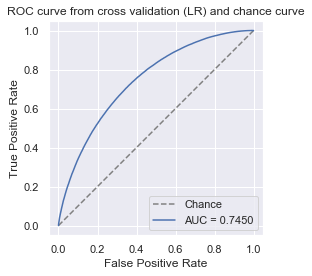

In [215]:
def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.4f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.title("ROC curve from cross validation (LR) and chance curve")
    plt.legend()
    plt.tight_layout()
    
plot_roc(train_dep[response],prediction_scores_lr)

In [197]:
from sklearn.ensemble import RandomForestClassifier
import math
import warnings
warnings.filterwarnings('ignore')

In [198]:
features_count = train_ind.shape[1]

parameters_rf = {'n_estimators':[50], 'max_depth':[20], 'max_features': 
                     [math.floor(np.sqrt(features_count)), math.floor(features_count/3)]}

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(n_estimators=70,criterion='gini' ,max_depth=30, max_features=4)
    clf.fit(features, target)
    return clf

trained_model_RF= random_forest_classifier(train_ind[features], train_dep[response])

In [199]:
# Predict the on the test_data
test_ind["Pred_state_RF"] = trained_model_RF.predict(test_ind[features])

# Predict the on the train_data
train_ind["Pred_state_RF"] = trained_model_RF.predict(train_ind[features])

# Train and Test Accuracy
print ("Train Accuracy :: ", accuracy_score(train_dep[response], trained_model_RF.predict(train_ind[features])))
print ("Test Accuracy  :: ", accuracy_score(test_dep[response], trained_model_RF.predict(test_ind[features])))

print (" Confusion matrix of test data is", confusion_matrix(test_dep[response],test_ind["Pred_state_RF"]))

Train Accuracy ::  0.8455944427024289
Test Accuracy  ::  0.6901517161533081
 Confusion matrix of test data is [[41397  8252]
 [17440 15829]]


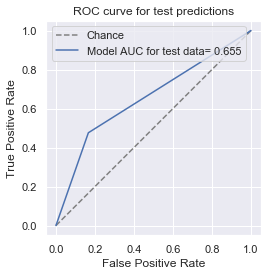

In [200]:
def plot_roc(labels, prediction_scores, type_data="test"):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    if type_data=="test":
        legend_string = 'Model AUC for test data= {:0.3f}'.format(auc)
    else:
        legend_string = 'Model AUC for train data= {:0.3f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    if type_data=="test":
        plt.title('ROC curve for test predictions')
    else:
        plt.title('ROC curve for train predictions')
    plt.legend()
    plt.tight_layout()
    
    
# Compute and plot the ROC curves
plot_roc(test_dep[response], trained_model_RF.predict(test_ind[features]))

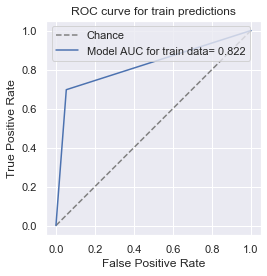

In [201]:
# Compute and plot the ROC curves
plot_roc(train_dep[response], trained_model_RF.predict(train_ind[features]), type_data="train")

**(h) Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").**

**Logistic Regression:**

We see an AUC of ~0.75 on training data. This is lower than the Random Forest model which scored a 0.822 on the train data.

**Random Forest:**

AUC for test data is 0.655 while that for training data is 0.822. This is better than the logistic regression model. However, the difference in the AUCs from the train and test data could be because of overfitting.

Let us look at the other metrics for some inference.

In [202]:
print(metrics.classification_report(test_dep[response], trained_model_RF.predict(test_ind[features])))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     49649
           1       0.66      0.48      0.55     33269

    accuracy                           0.69     82918
   macro avg       0.68      0.65      0.66     82918
weighted avg       0.69      0.69      0.68     82918



In [203]:
print(metrics.classification_report(train_dep[response], trained_model_RF.predict(train_ind[features])))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88    148067
           1       0.90      0.70      0.79    100687

    accuracy                           0.85    248754
   macro avg       0.86      0.82      0.83    248754
weighted avg       0.85      0.85      0.84    248754



Accuracy of the model is 69% on test data i.e. 69% of all the records have been predicted correctly. Training accuracy is higher at 85% (85% of the records were predicted accurately.)

**Precision for class 1 is 66%** which essentially means that of all the projects that were predicted as 1 (successful), 66% were actually successful. This is a good score for this use case.

**Recall or tpr for class 1 is 48%** which means that only 47% of the actual succesful projects were classified as successful by the model. This is very low.

This is a possible limitation of the model. We also see that the train accuracy of the model (along with all other metrics) is pretty high/ better as compared to the test model. This might be due to overfitting.

We could improve the model performance by:
1. Trying a different model (more flexible model) to fit better on the data
2. Engineering more features to improve the predictive accuracy of the model
3. Tuning the hyperparameters for Random Forest better to minimize variance and bias will prevent overfitting.

In [204]:
feature_imp_RF=pd.DataFrame(list(zip(features,trained_model_RF.feature_importances_)))
column_names_RF= ['features','RF_imp']
feature_imp_RF.columns= column_names_RF

feature_imp_RF= feature_imp_RF.sort_values('RF_imp',ascending=False)
feature_imp_RF[:15]

,features,RF_imp
0,goal_log,0.100869
17,avg_success_rate_goal,0.080731
18,avg_success_rate_duration,0.078740
6,name_len,0.077343
9,name_words,0.064643
1,duration,0.061567
5,launched_week,0.054722
15,participants_wk,0.047422
14,participants_mth,0.042985
13,participants_qtr,0.034884


Text(0.5, 1.0, 'Feature importance of top 10 important features')

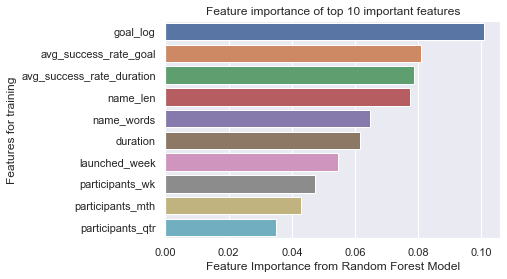

In [205]:
ax = sns.barplot(x="RF_imp", y="features", data=feature_imp_RF[:10])
ax.set_ylabel("Features for training")
ax.set_xlabel("Feature Importance from Random Forest Model")
ax.set_title("Feature importance of top 10 important features")

The most important feature is 'avg_success_rate_goal' followed by 'avg_success_rate_duration'. These metrics mean:
 * average success rate of previous similar projects (category) that had a similar goal
 * average success rate of previous similar projects (category) that had a similar duration
 
However, goal amount (converted to log(goal)) follows closely as the third most important feature. It looks like the goal amount set by a project creator largely determines if it will be successful in gathering enough funds or not.